In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from scipy import signal as sig

In [2]:
#initial constants
delta_t = 0.00025

nb_ptw = 2.56 #seconds

#voltage
V = 3.7

tau = 300 #s
act = 60  #s

ptw_disc = int(nb_ptw/delta_t) #timesteps
msg_interval = 40000 #timesteps


to_mAh = 1000*delta_t/3600

In [3]:
datasets_n = 2

In [4]:
##CoAP
psm_coap_nb   = "../measurements/otii/psm_coap_5tau1act_test0_nbiot.csv" 
psm_coap_ltem = "../measurements/otii/psm_coap_5tau1act_test0_ltem.csv"

coap_data = []
coap_data.append(pd.read_csv(psm_coap_nb))
coap_data.append(pd.read_csv(psm_coap_ltem))      

In [5]:
## MQTT
psm_mqtt_nb   = "../measurements/otii/psm_mqtt_5tau1act_test0_nbiot.csv"
psm_mqtt_ltem = "../measurements/otii/psm_mqtt_5tau1act_test0_ltem.csv"

mqtt_data = []
mqtt_data.append(pd.read_csv(psm_mqtt_nb))
mqtt_data.append(pd.read_csv(psm_mqtt_ltem))

In [6]:
coap_energy = []
coap_current = []
for i in coap_data:
    coap_energy.append(i["Arc Main Energy (J)"])
    coap_current.append(i["Arc Main Current (A)"])

mqtt_energy = []
mqtt_current = []
for i in mqtt_data:
    mqtt_energy.append(i["Arc Main Energy (J)"])
    mqtt_current.append(i["Arc Main Current (A)"])

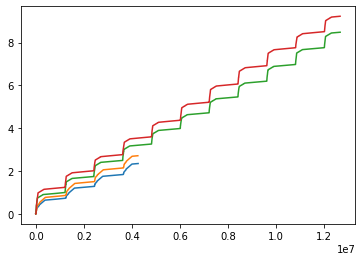

In [7]:
plt.figure()
for i in range(datasets_n):
    coap_energy[i].plot()
    mqtt_energy[i].plot()

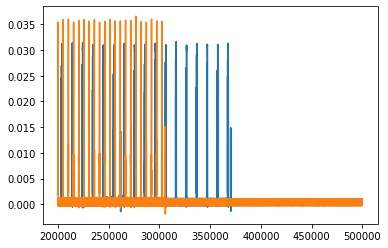

In [15]:
plt.figure()
for i in range(datasets_n):
    coap_current[i].iloc[200000:500000].plot()
    #mqtt_current[i].plot()

In [9]:
segments_coap = []

idx = 0
indexes_coap = []
for batch in coap_current:
    print("Batch: " + str(idx))
    curr_set = []
    i = 1000000
    index_list = []
    endpoint = (batch.index.size)
    while(i < endpoint):
        curr_meas = batch.iloc[i]
        if(curr_meas > 0.04):    
            curr_set.append(batch.iloc[(i-ptw_disc):(i+30*ptw_disc)])
            i+=int(tau/delta_t)
            index_list.append(i)
        else:
            i += 1
    indexes_coap.append(index_list)
    segments_coap.append(curr_set)
    idx += 1

Batch: 0
Batch: 1


In [10]:
idx = 0

coap_sums_nb = []
coap_sums_ltem = []

for segment in segments_coap[0]:
    coap_sums_nb.append(segment.sum()*to_mAh) ## convert to mAh

for segment in segments_coap[1]:
    coap_sums_ltem.append(segment.sum()*to_mAh) ## convert to mAh

In [11]:
segments_mqtt = []

idx = 0

for batch in mqtt_current:
    print("Batch: " + str(idx))
    i = 1000000
    curr_set = []
    
    while(i < batch.index.size):
        curr_meas = batch.iloc[i]

        if(curr_meas > 0.04):    
            curr_set.append(batch.iloc[(i-ptw_disc):(i+30*ptw_disc)])
            i+=int(tau/delta_t)
        else:
            i += 1
    segments_mqtt.append(curr_set)
    idx += 1

Batch: 0
Batch: 1


In [12]:
idx = 0

mqtt_sums_nb = []
mqtt_sums_ltem = []

for segment in segments_mqtt[0]:
    mqtt_sums_nb.append(segment.sum()*to_mAh) ## convert to mAh

for segment in segments_mqtt[1]:
    mqtt_sums_ltem.append(segment.sum()*to_mAh) ## convert to mAh

([<matplotlib.axis.XTick at 0x1a26e5c150>,
 <a list of 4 Text xticklabel objects>)

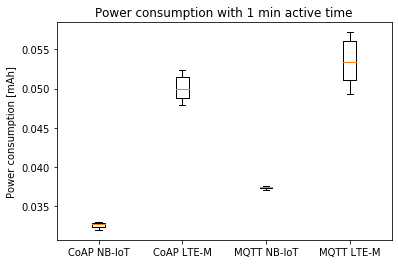

In [13]:
## Boxplot showing the diff between the different segmetnt's power consumption
plt.figure()
plt.title("Power consumption with 1 min active time")
plt.ylabel('Power consumption [mAh]')

plt.boxplot(coap_sums_nb, positions = [1])
plt.boxplot(coap_sums_ltem, positions = [2])
plt.boxplot(mqtt_sums_nb, positions = [3])
plt.boxplot(mqtt_sums_ltem, positions = [4])
plt.xticks([1,2,3,4], ["CoAP NB-IoT", "CoAP LTE-M", "MQTT NB-IoT", "MQTT LTE-M"])